In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('rh.csv')

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
#création des dummies :
df_final = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary']]
df_final = pd.get_dummies(df_final, columns=['sales'], drop_first=True)
df_final = pd.get_dummies(df_final, columns=['salary'], drop_first=True)#get dummies sur ces colones car ce sont des catégories

df_final.head()




,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [7]:
df_final.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

In [8]:
X = df_final[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium']]

y = df_final['left']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)





In [10]:
df_final.shape

(14999, 19)

[[0.00000000e+00 1.20000000e+04 0.00000000e+00 2.00000000e+00]
 [1.00000000e+00 1.20010000e+04 0.00000000e+00 2.00000000e+00]
 [2.00000000e+00 1.20020000e+04 0.00000000e+00 2.00000000e+00]
 ...
 [2.99860000e+04 2.99880000e+04 1.47476504e+03 4.70800000e+03]
 [2.99920000e+04 2.99940000e+04 3.88938062e+03 9.86400000e+03]
 [2.99930000e+04 2.99950000e+04 7.13658047e+03 1.49990000e+04]]


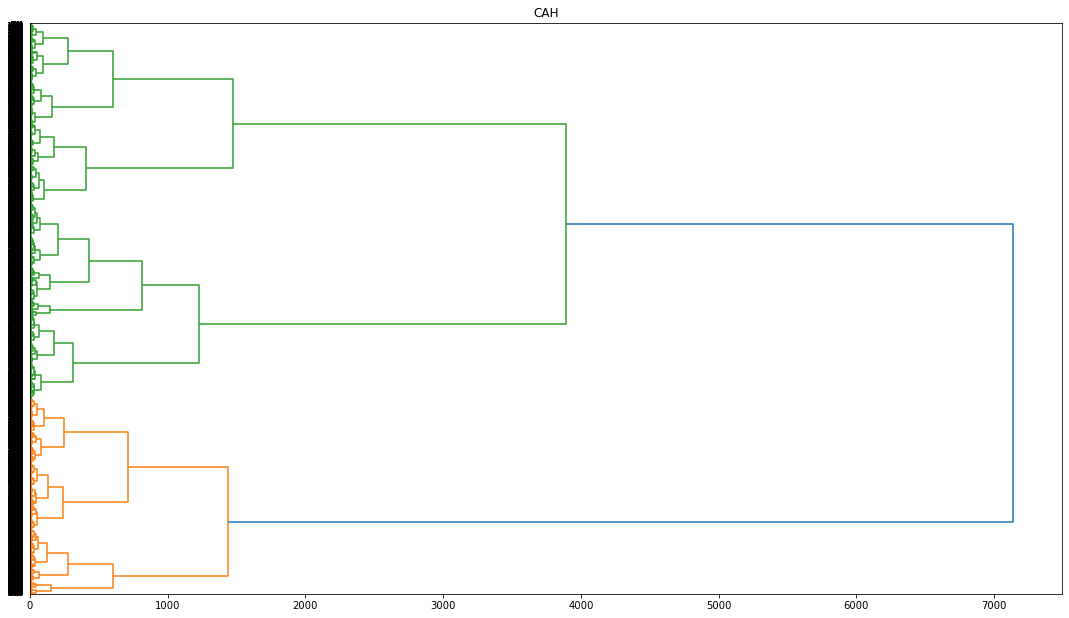

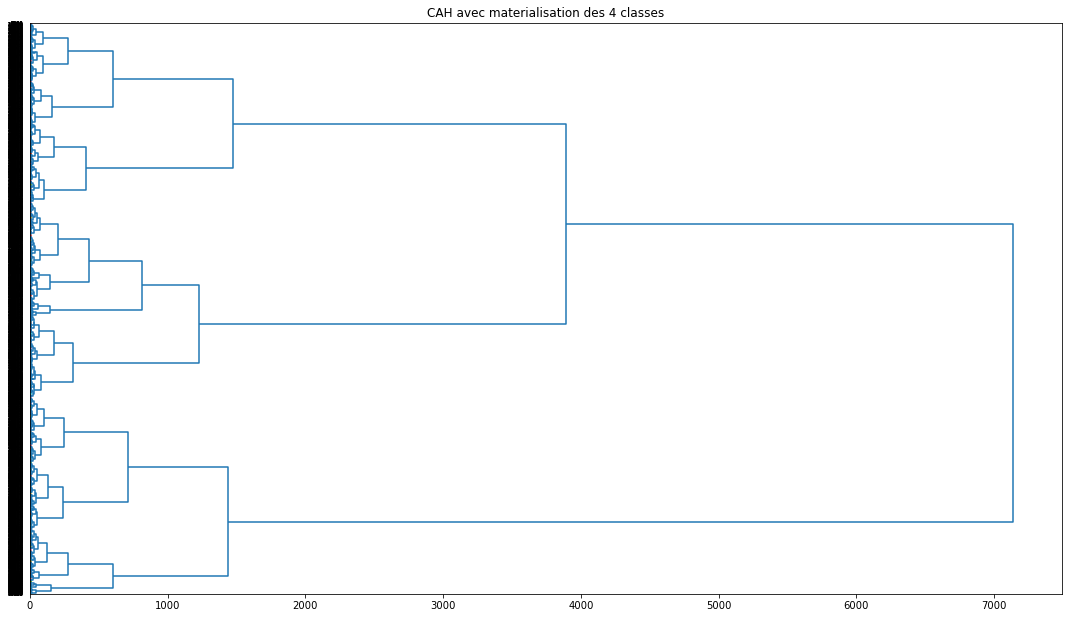

In [12]:
#CLUSTER : (METHODE NON SUPERVISEE)
import matplotlib.pyplot as plt
#générer la matrice des liens puis le dendrogramme
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_final, method = 'ward', metric = 'euclidean')
print(Z) #si on veut afficher les valeurs de clusturing

#affichage du dendrogramme
labels=list(df_final.index)
plt.title("CAH")
dendrogram(Z,
            orientation='right',
            distance_sort='descending',
           labels=labels
          )
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

#matérialisation des 4 classes (hauteur t = 7)
plt.title('CAH avec materialisation des 4 classes')
dendrogram(Z,orientation='right',color_threshold=6, labels=labels)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [15]:
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

def data_preproc():
    return X_train, Y_train, X_val, Y_val, X_test,y_test

def modele(X_train, Y_train, X_val, Y_val):
    model = Sequential()
    model.add(Dense({{choice([128, 256, 512, 1024])}}, input_shape=(284981,)))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense({{choice([128, 256, 512, 1024])}}))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    adam = keras.optimizers.Adam(lr={{choice([10**-3, 10**-2, 10**-1])}})
    rmsprop = keras.optimizers.RMSprop(lr={{choice([10**-3, 10**-2, 10**-1])}})
    sgd = keras.optimizers.SGD(lr={{choice([10**-3, 10**-2, 10**-1])}})

In [16]:
choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}

if choiceval == 'adam':
    optim = adam
elif choiceval == 'rmsprop':
    optim = rmsprop
else:
    optim = sgd
    
    
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
optimizer=optim)
model.fit(X_train, Y_train,
batch_size={{choice([128,256,512])}},
epochs=20,
verbose=2,
validation_data=(X_val, Y_val))
score, acc = model.evaluate(X_val, Y_val, verbose=0)
print('Test accuracy:', acc)
return {'loss': -acc, 'status': STATUS_OK, 'model': model}

TypeError: require string label